In [1]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('ks-projects-201801.csv', encoding='utf-8')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
missing_values = df.isnull().sum()

# Remove whitespace from column names
whitespace_columns = df.columns.str.contains(' ')
if any(whitespace_columns):
    df.columns = df.columns.str.strip()
print('Missing values:\n', missing_values)
print('\nColumns with whitespace removed:', whitespace_columns)

Missing values:
 ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Columns with whitespace removed: [False False False False False False False False False False False False
  True False False]


In [4]:
df = df.dropna(subset=['name'])
missing_values_after = df.isnull().sum()

print('Missing values after cleaning:\n', missing_values_after)

Missing values after cleaning:
 ID                     0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [5]:
# Fill missing 'usd pledged' with the median value of the column
df['usd pledged'] = df['usd pledged'].fillna(df['usd pledged'].median())
missing_values_final = df.isnull().sum()
print('Missing values after final cleaning:\n', missing_values_final)

Missing values after final cleaning:
 ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64


In [6]:
#Drop all unfinished projects
unfinished_states = ['live', 'undefined', 'suspended', 'canceled']
df = df[~df['state'].isin(unfinished_states)]

# Generate dummy variables for categorical features
categorical_cols = ['category', 'main_category', 'currency', 'country']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert the dependent variable 'state' into binary values [0,1]
df['state'] = df['state'].apply(lambda x: 1 if x == 'successful' else 0)
print('Dataframe after processing:')
df.head()

Dataframe after processing:


,ID,name,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,100.0,2421.0,...,False,False,False,False,False,False,False,False,False,True
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,220.0,220.0,...,False,False,False,False,False,False,False,False,False,True
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,1.0,1.0,...,False,False,False,False,False,False,False,False,False,True
5,1000014025,Monarch Espresso Bar,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,52375.0,52375.0,...,False,False,False,False,False,False,False,False,False,True


In [7]:
X = df.drop(['ID', 'name', 'deadline', 'launched', 'state'], axis=1)
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [9]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39576
           1       1.00      1.00      1.00     26759

    accuracy                           1.00     66335
   macro avg       1.00      1.00      1.00     66335
weighted avg       1.00      1.00      1.00     66335



In [10]:
# Calculate the accuracy score
score = logreg.score(X_test, y_test)
print(f'Accuracy:{score*100:.4f}%')

Accuracy:99.9065%


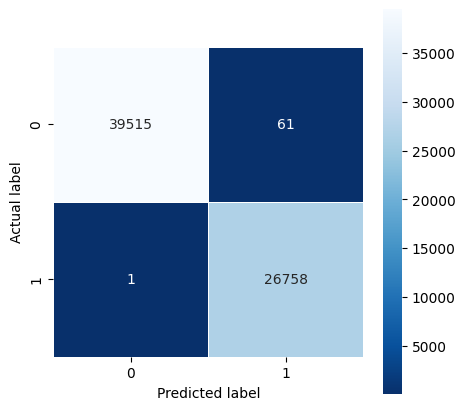

In [11]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
